This project aims to build a Decision Tree model that predicts whether a loan application will be approved based on given features, improving the decision-making process for banks.



In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
data = pd.read_csv('loan_approval_dataset.csv')

In [51]:
data.head(3)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [53]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [54]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

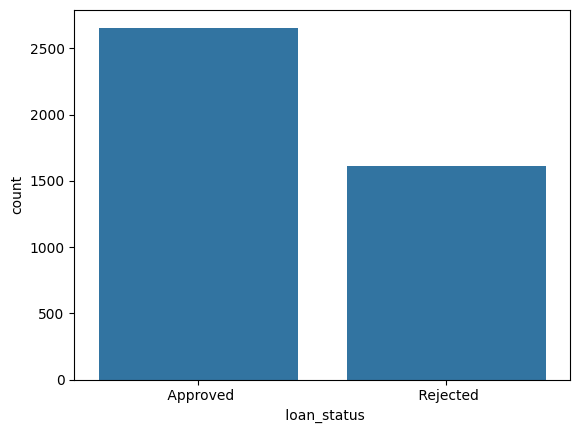

In [55]:
sns.countplot(data=data, x =' loan_status')
plt.show()

<Axes: xlabel=' self_employed', ylabel='count'>

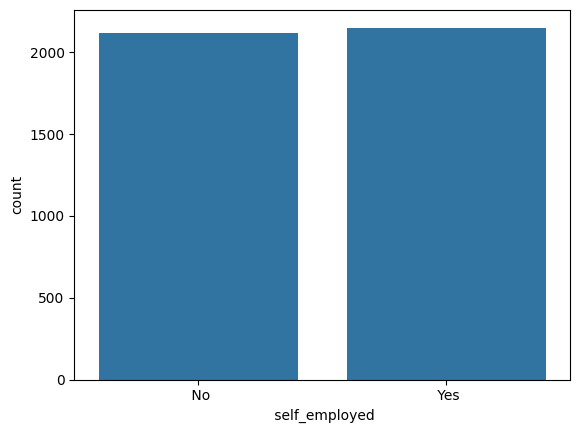

In [56]:
sns.countplot(data=data, x =' self_employed')

<Axes: xlabel=' education', ylabel='count'>

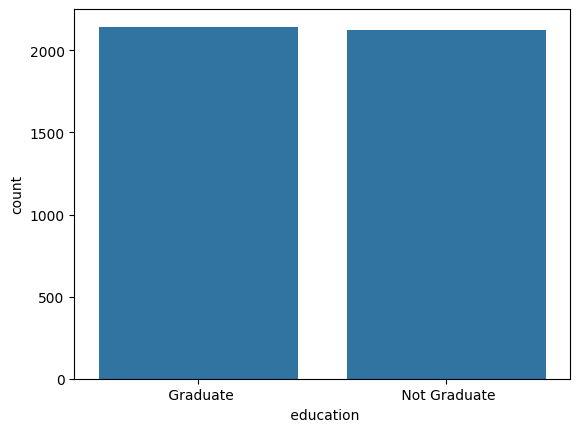

In [57]:
sns.countplot(data=data, x =' education')

<Axes: >

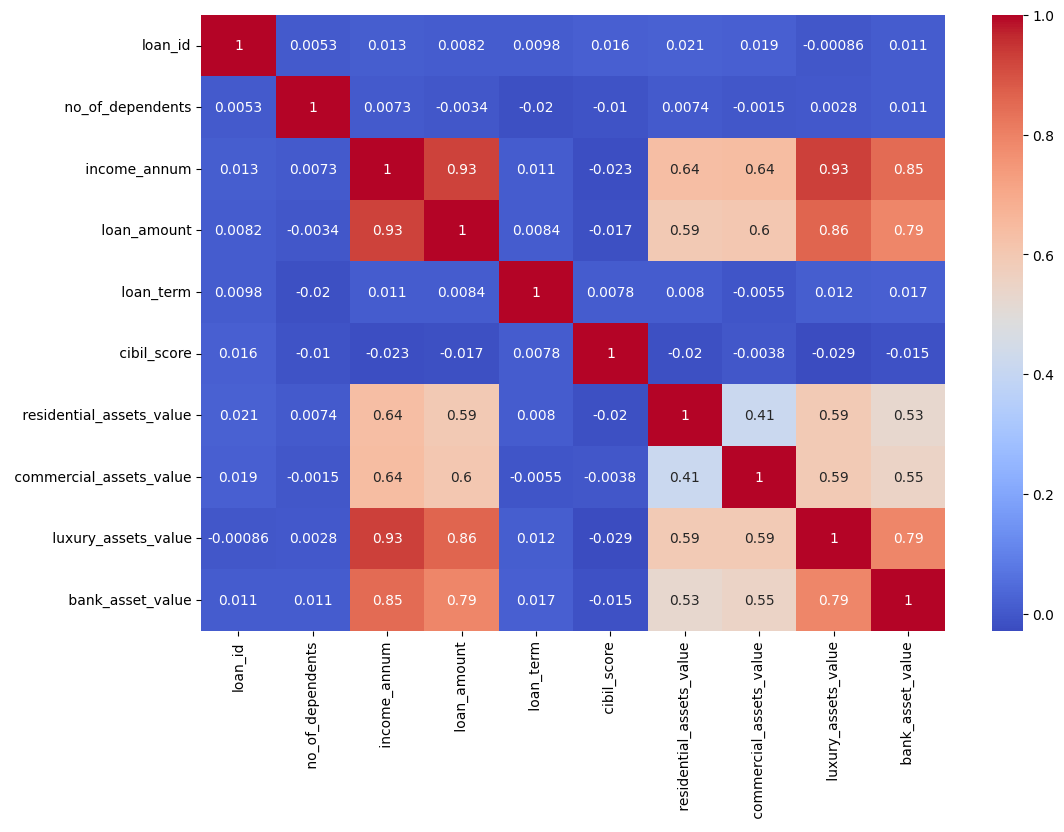

In [58]:
numerics = data.select_dtypes(include=['int64', 'float64'])


plt.figure(figsize=(12,8))
sns.heatmap(numerics.corr(),cmap='coolwarm', annot=True)

In [59]:
categoricals = data.drop(columns=[' loan_status']).select_dtypes(include=['object']).columns.to_list()


In [60]:
data = pd.get_dummies(data=data , columns =categoricals, drop_first=True)

In [61]:
data.columns

Index(['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount',
       ' loan_term', ' cibil_score', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value',
       ' loan_status', ' education_ Not Graduate', ' self_employed_ Yes'],
      dtype='object')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    income_annum              4269 non-null   int64 
 3    loan_amount               4269 non-null   int64 
 4    loan_term                 4269 non-null   int64 
 5    cibil_score               4269 non-null   int64 
 6    residential_assets_value  4269 non-null   int64 
 7    commercial_assets_value   4269 non-null   int64 
 8    luxury_assets_value       4269 non-null   int64 
 9    bank_asset_value          4269 non-null   int64 
 10   loan_status               4269 non-null   object
 11   education_ Not Graduate   4269 non-null   bool  
 12   self_employed_ Yes        4269 non-null   bool  
dtypes: bool(2), int64(10), object(1)
memory usage: 375.3+ KB


In [63]:
from sklearn.preprocessing import StandardScaler
numerics_list = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
scaler = StandardScaler()
data[numerics_list] = scaler.fit_transform(data[numerics_list])

In [65]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['loan_id', ' loan_status'])
y = data[' loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

In [71]:
print(accuracy_score(y_pred, y_test))

0.9695550351288056


In [72]:
print(confusion_matrix(y_pred, y_test))

[[509  12]
 [ 14 319]]


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Approved       0.98      0.97      0.98       523
    Rejected       0.96      0.96      0.96       331

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



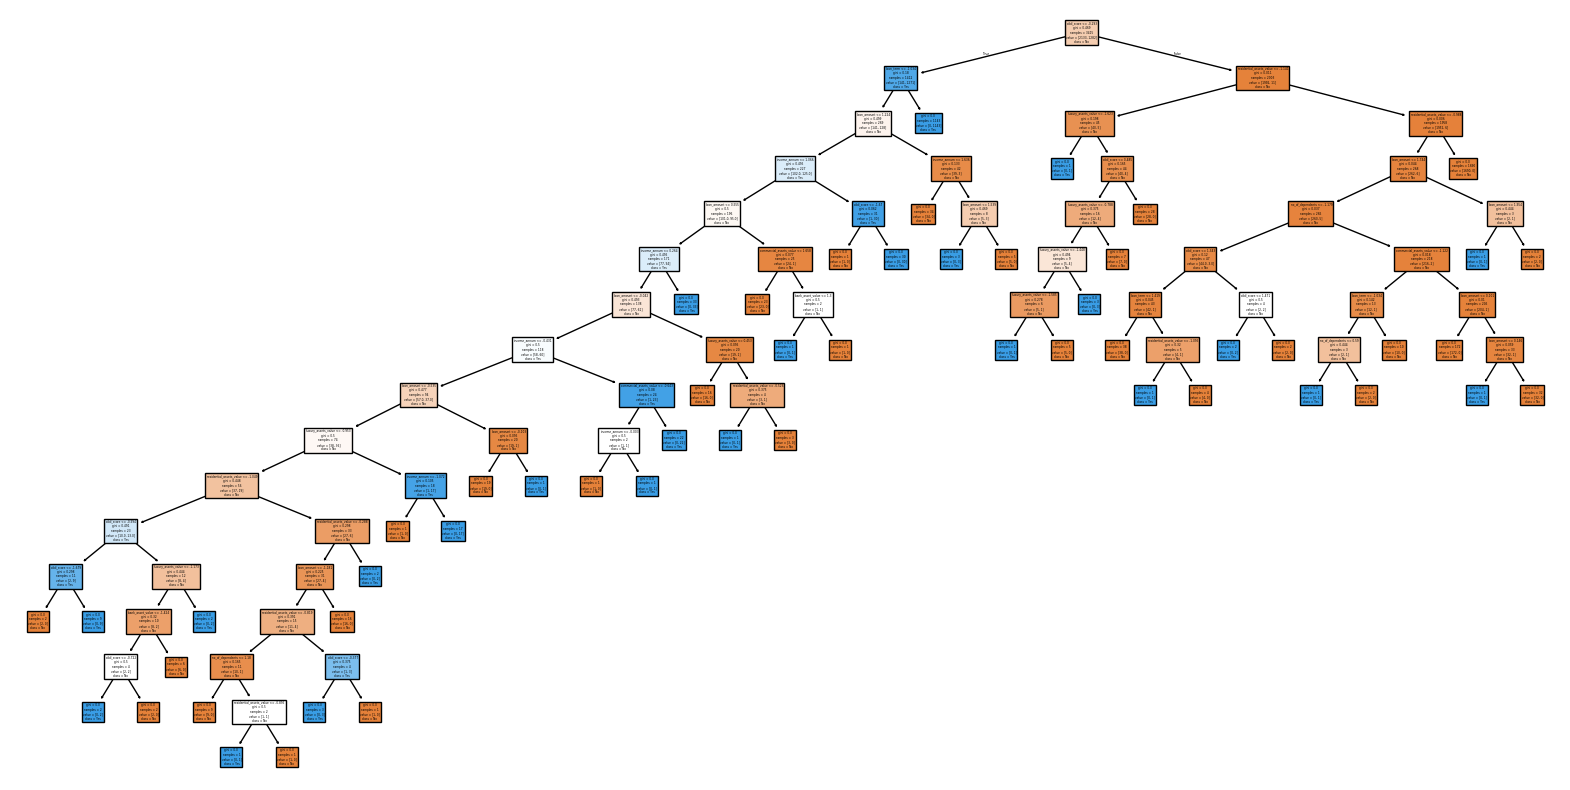

In [74]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


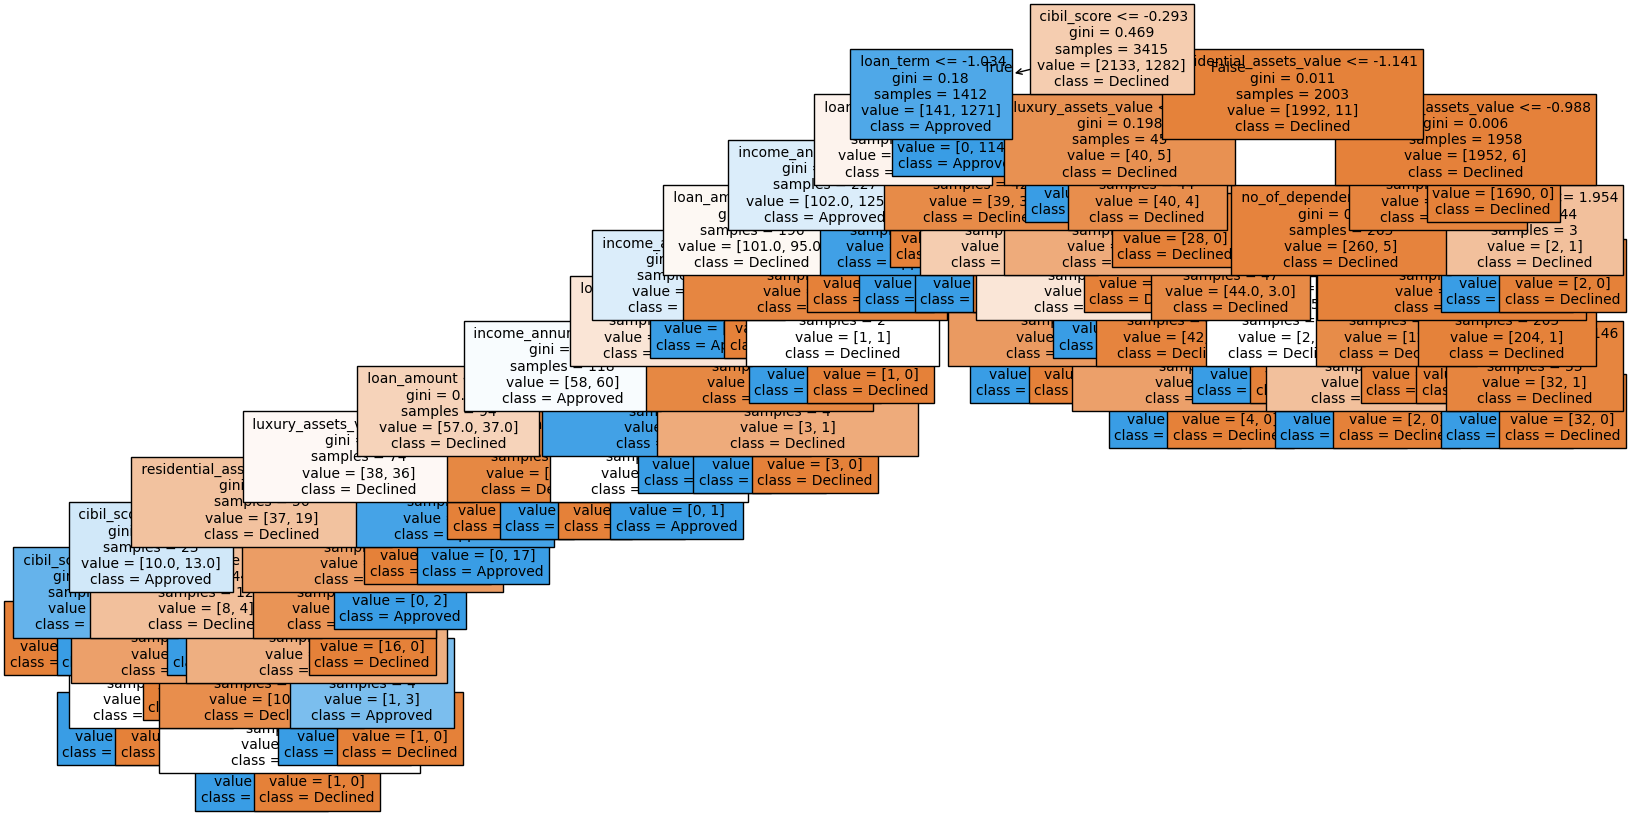

In [75]:

plt.figure(figsize=(20, 10))  # Increase the figure size
plot_tree(model, feature_names=X.columns, class_names=['Declined', 'Approved'], filled=True, fontsize=10)
plt.show()
